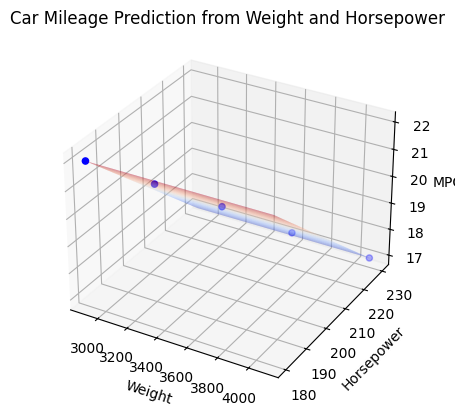

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Example data
data = {
    'Weight': [3500, 3700, 2900, 3200, 4100],  # weights of cars
    'Horsepower': [200, 220, 180, 190, 230],   # horsepower
    'MPG': [20, 18, 22, 21, 17]                # miles per gallon
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model
X = df[['Weight', 'Horsepower']]
y = df['MPG']
model.fit(X, y)

# Create a mesh grid of weight and horsepower values
weight_range = np.linspace(X['Weight'].min(), X['Weight'].max(), 100)
horsepower_range = np.linspace(X['Horsepower'].min(), X['Horsepower'].max(), 100)
weight_grid, horsepower_grid = np.meshgrid(weight_range, horsepower_range)

# Predict MPG over the mesh grid
# Using a DataFrame to maintain feature names consistency
new_data = pd.DataFrame({'Weight': weight_grid.ravel(), 'Horsepower': horsepower_grid.ravel()})
mpg_pred = model.predict(new_data).reshape(weight_grid.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(weight_grid, horsepower_grid, mpg_pred, alpha=0.5, cmap='coolwarm')

# Scatter plot with actual data
ax.scatter(X['Weight'], X['Horsepower'], y, color='b', marker='o')

ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
ax.set_title('Car Mileage Prediction from Weight and Horsepower')

plt.show()
